## Lets Grow More
#### *Name: SAUBHIK MAITY*
Data Science Intern @ LGMVIP FEB2022

Task-2: Stock Market Prediction and Forecasting using Stacked LSTM

Dataset:https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

## Importing the Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

## Reading the Data

In [3]:
data_set = pd.read_csv(r'D:\LETS GROW MORE\NSE-TATAGLOBAL.csv')
data_set

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


## Exploring Data and Making required changes for better understanding

In [4]:
data_set.isnull().sum()
# No null values so we can proceed

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [5]:
data_set['Date'] = pd.to_datetime(data_set['Date'])

In [6]:
df = data_set.sort_values('Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [7]:
df.reset_index(inplace=True)

## Visualizing the Data

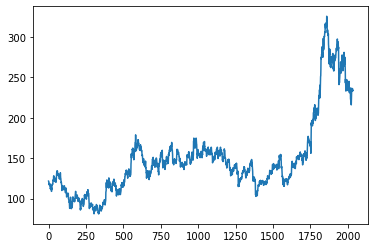

In [8]:
plt.plot(df['Close'])

In [9]:
df_close = df['Close']
df_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

## Feature Scaling

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))

In [11]:
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

## Splitting the data into training and test sets

In [12]:
training_size = int(len(df_close)*0.70)
test_size = len(df_close) - training_size
train, test = df_close[0: training_size,:], df_close[training_size : len(df_close),:1]

In [13]:
# Let us convert the array values previously calculated into a matrix
def create_mat(ds, time_step = 1):
    dataX, dataY = [],[]
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i + time_step, 0])
    return np.array(dataX), np.array(dataY)  

In [14]:
time_step = 100
X_train, y_train = create_mat(train, time_step)
X_test, y_test = create_mat(test, time_step)

In [15]:
X_train.shape

(1323, 100)

In [16]:
y_train.shape

(1323,)

In [17]:
X_test.shape

(510, 100)

In [18]:
y_test.shape

(510,)

In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Building the Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [21]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose = 1)

Epoch 1/60
19/19 [==============================] - 8s 178ms/step - loss: 0.0105 - val_loss: 0.0012
Epoch 2/60
19/19 [==============================] - 2s 119ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 3/60
19/19 [==============================] - 2s 112ms/step - loss: 9.7722e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 2s 112ms/step - loss: 8.5470e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 2s 117ms/step - loss: 8.1336e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 2s 120ms/step - loss: 7.9256e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 2s 129ms/step - loss: 7.7638e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 2s 121ms/step - loss: 7.4928e-04 - val_loss: 9.5384e-04
Epoch 9/60
19/19 [==============================] - 2s 119ms/step - loss: 7.3210e-04 - val_loss: 9.2633e-04
Epoch 10/60
19/19 [==============================] - 2s 119ms/st

In [23]:
predictions = model.predict(X_test)

In [24]:
# performing inverse transform on predictions
inv_predictions = scaler.inverse_transform(predictions)

In [25]:
inv_predictions

array([[140.99687 ],
       [141.26645 ],
       [140.58398 ],
       [138.28105 ],
       [136.5486  ],
       [135.71906 ],
       [136.45166 ],
       [137.8114  ],
       [138.42143 ],
       [138.37828 ],
       [138.29556 ],
       [139.291   ],
       [140.0441  ],
       [141.44887 ],
       [143.4613  ],
       [142.09137 ],
       [139.96126 ],
       [139.25206 ],
       [139.45966 ],
       [143.51398 ],
       [147.71443 ],
       [150.35345 ],
       [151.33167 ],
       [149.91388 ],
       [149.49692 ],
       [148.98976 ],
       [149.0384  ],
       [150.31708 ],
       [151.08705 ],
       [151.30905 ],
       [151.77733 ],
       [150.94733 ],
       [148.20161 ],
       [143.10463 ],
       [139.45363 ],
       [137.87166 ],
       [137.5947  ],
       [136.90948 ],
       [135.09389 ],
       [131.99315 ],
       [129.5482  ],
       [128.12502 ],
       [126.08177 ],
       [125.04892 ],
       [123.164085],
       [120.73763 ],
       [119.7642  ],
       [119.2

## Performance Metrics

## Mean Square error

In [26]:
import math
from sklearn.metrics import mean_squared_error

In [27]:
mse = math.sqrt(mean_squared_error(y_test, predictions))
print("The Mean Squared Error for The model is:", mse)

The Mean Squared Error for The model is: 0.0437564957792351


## Conclusion: we can conclude that the mean squared error is low and is 0.0437564957792351